# Analysis of perceived harmfullness

This notebook loads amazon web-scraped data and analyzes the correlation between perceived harmfulness of products and 'greenwashing' keywords from the products descriptions.

## Setup

In [ ]:
import pandas as pd
import numpy as np

## Data preparation

Load the dataset

In [ ]:
# products = pd.read_csv('products1.csv.gz') # out keywords
# products = pd.read_csv('products2.csv.gz') # extended keywords
products = pd.read_csv('products.csv.gz') # both combined (duplicates removed), no website

In [ ]:
products["keyword"].unique()

array(['bleach+tablets', 'Kitchen+cleaner', 'Dishwasher+detergent',
       'Window+spray', 'Fabric+softener', 'Laundry+sanitizer',
       'Moisture+absorber', 'Disinfectant+spray', 'Kettle+descaler',
       'Spot+remover', 'Glass+cleaner', 'Stain+eliminator',
       'Machine+descaler', 'Dishwasher+pods', 'Odor+lifter',
       'Bleach+pods', 'Window+cleaner', 'Detergent+tablets',
       'Bathroom+cleaner', 'Soap+pods', 'Washing+powder', 'Stain+remover',
       'Laundry+sheets', 'Disinfectant+wipes', 'Laundry+powder',
       'Flashlight', 'Mouthwash', 'Contact+Lens+Solutions',
       'Prescription+Medications', 'Fabric+Softener', 'Razor', 'Lotion',
       'Deodorant', 'Sponges', 'Extension+Cords', 'Eye+Drops',
       'Hydrogen+Peroxide', 'Allergy+Medications', 'Shampoo',
       'Rubbing+Alcohol', 'Cough+Syrup', 'Antibiotic+Ointment',
       'Light+Bulbs', 'Conditioner', 'Laundry+Detergent',
       'Insect+Repellent', 'Vitamins', 'Paper+Towels', 'Bar+Soap',
       'Toothpaste', 'Cotton+Sw

Drop the whole website, which takes up a lot of memory

This has already been done for the `products.csv.gz` dataset.

In [ ]:
# products = products.copy().drop("webpage", axis = 1) 

Find missing values. There are some missing descriptions.

In [ ]:
products.isna().any()

keyword                False
name                   False
url                    False
product_description     True
dtype: bool

There are 129 of them.

In [ ]:
products[products.isna().any(axis=1)]

,keyword,name,url,product_description
770,Bleach+pods,"Clorox Bleach Packs, Bleach Laundry Pods, Zero...",https://amazon.com/Clorox-Zero-Splash-Bleach-P...,NaN
771,Bleach+pods,"Grab Green Bleach Alternative Pods, 60 Count, ...",https://amazon.com/Grab-Green-Alternative-Unsc...,NaN
772,Bleach+pods,GuardH Bleach Tablets - 40 count. Bleach for l...,https://amazon.com/GuardH-Bleach-Tablets-Multi...,NaN
773,Bleach+pods,Country Save Laundry Detergent Powder Natural-...,https://amazon.com/Country-Save-Detergent-Natu...,NaN
774,Bleach+pods,Dropps Laundry & Household Oxi Booster Pods: U...,https://amazon.com/Dropps-Laundry-Household-Bo...,NaN
...,...,...,...,...
4090,Shaving+Cream,Musgo Real Shaving Cream - Classic Scent 3.4 O...,https://amazon.com/Musgo-Real-Shaving-Cream-Cl...,NaN
4092,Shaving+Cream,The Art of Shaving Unscented Shaving Cream for...,https://amazon.com/Art-Shaving-Cream-Unscented...,NaN
4095,Shaving+Cream,Proraso Shaving Soap,https://amazon.com/Proraso-Shaving-Soap-Moistu...,NaN
4099,Shaving+Cream,Proraso Shaving Cream for Men,https://amazon.com/Proraso-Shaving-Cream-Sensi...,NaN


Drop them for now

In [ ]:
products = products[-products.isna().any(axis=1)]

## Ecological keywords in product descriptions

Convert all to small case, strip

In [ ]:
products["product_description"] = products["product_description"].copy().apply(lambda desc: desc.strip().lower())

Have a look at one description

In [ ]:
products["product_description"][128]

'about this item    seventh generation free & clear dishwasher detergent powder powers through stuck-on food    this powerful formula leaves dishes spot-free, streak-free and sparkling clean    0% fragrances, dyes or chlorine bleach    not tested on animals    works well even in hard water conditions'

List of relevant green keywords

In [ ]:
green_keywords = [
    'eco friendly', 'earth friendly', 'environmentally friendly',
    'eco', 'bio',  'not tested on animals'
    'reusable', 'green',
    'free & gentle', 'free & clear', 'free and gentle', 'free and clear',
    'safe', 'sensitive, gentle', 'probiotic', 'botanical', 'natural',
    'plant based', 'plant-based', 'hypoallergenic', 'recycled', 'vegan', 'organic',
    'alternative', 'compostable', 'bamboo', 'renewable', 'biodegradable',
    'sustainable', 'eco', 'responsible', 'responsibility', 'certified',
    'durable', 'no chemicals', 'non gmo', 'non-gmo', 'washable'
]


Count keywords

In [ ]:
def count_keywords(item, keywords):
    counts = [item.count(keyword) for keyword in keywords]
    return sum(counts)


In [ ]:
import collections

products["desc_green_count"] = products["product_description"].apply(lambda desc: count_keywords(desc, green_keywords))

Calculate the mean by a search keyword

In [ ]:
mean_green_desc = products.groupby("keyword")["desc_green_count"].mean()

Plot

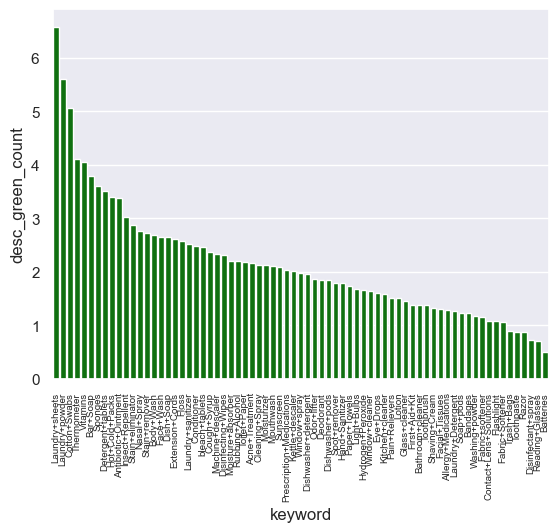

In [ ]:
mean_green_desc_plot = pd.DataFrame(mean_green_desc.sort_values(ascending = False)).reset_index()

by_school=sns.barplot(x ='keyword',y ='desc_green_count',data = mean_green_desc_plot,color="green",ci=None)

for item in by_school.get_xticklabels():
    item.set_rotation(90)
    item.set_size(7)

plt.savefig('Plot.png', dpi=300, bbox_inches='tight')


## Word emberrings

### Prepare data

Split two-word keywords in case there is more than one

In [ ]:
products["keyword1"] = products["keyword"].apply(lambda word: word.split('+', 1)[0].lower())
products["keyword2"] = products["keyword"].apply(lambda word: word.split('+', 1)[0].lower())

### Download model

Prepare a list of unique keywords

In [ ]:
keywords = products["keyword1"].append(products["keyword2"]).unique()

Prepare

In [ ]:
import gensim
# import json
import pandas as pd
import gensim.downloader as api
import matplotlib.pyplot as plt
from numpy.linalg import norm

Load the model

In [ ]:
## download a pre-trained model and load it into ram
model = api.load("glove-wiki-gigaword-100")

In [ ]:
def cosine_similarity(vector1,vector2):
    result = np.dot(vector1, vector2)/(norm(vector1)*norm(vector2))
    return result

In [ ]:
np.empty((100,0))

array([], shape=(100, 0), dtype=float64)

### Create a vector between two opposites

Generate lists of embeddings for groups of positive and negative words

In [ ]:
## let's define an axis
w1 = "ecological"
w2 = "harmful"
axis = model.get_vector(w2) - model.get_vector(w1)

positive_words = ["ecology", "environment", "sustainable", "renewable", "nature"]
negative_words = ["pollution", "emission", "chemical", "deforestation", "smog"]

positive_words_embeddings = []

for word in positive_words:
    positive_words_embeddings.append(model.get_vector(word))
    # np.concatenate((, model.get_vector(word)))

negative_words_embeddings = []

for word in negative_words:
    negative_words_embeddings.append(model.get_vector(word))

positive_words_embeddings = np.array(positive_words_embeddings)
negative_words_embeddings = np.array(negative_words_embeddings)


Create a vector

In [ ]:
axis = negative_words_embeddings.mean(axis=0) - positive_words_embeddings.mean(axis=0)


### Check position in vector space

List 10 words closest to the two extremes of the axes

In [ ]:
model.most_similar(positive=[positive_words_embeddings.mean(axis=0)], topn=10)

[('environment', 0.8834255933761597),
 ('sustainable', 0.848753809928894),
 ('development', 0.7633209824562073),
 ('ecological', 0.7618227601051331),
 ('environmental', 0.7481111288070679),
 ('ecology', 0.747917115688324),
 ('conservation', 0.7468903064727783),
 ('nature', 0.730949342250824),
 ('natural', 0.7257879972457886),
 ('biodiversity', 0.725212574005127)]

In [ ]:
model.most_similar(positive=[negative_words_embeddings.mean(axis=0)], topn=10)

[('pollution', 0.9005914926528931),
 ('emissions', 0.8254444599151611),
 ('dioxide', 0.7731346487998962),
 ('smog', 0.7709972858428955),
 ('carbon', 0.7695528268814087),
 ('emission', 0.746194064617157),
 ('greenhouse', 0.7460324168205261),
 ('pollutants', 0.7371047139167786),
 ('gases', 0.722122311592102),
 ('ozone', 0.6999489068984985)]

### Project keywords

For each word, get its position relative to the vector

In [ ]:
## choose some words to project on it
words = keywords
projections = []
for word in words:
    wordvector = model.get_vector(word)
    projections.append(cosine_similarity(wordvector,axis))

Plot the result, add labels for a few words

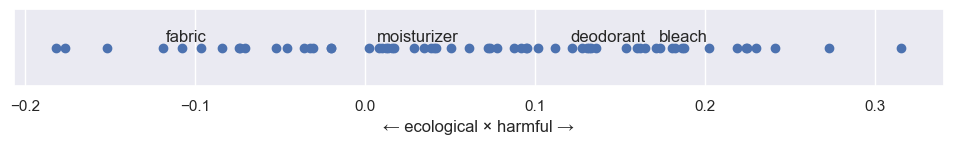

<Figure size 640x480 with 0 Axes>

In [ ]:
## plot the result
fig = plt.figure(figsize=(12,1))
ax = fig.add_subplot(1,1,1)
ax.scatter(projections,y=np.zeros(len(projections)))
for i in range(len(projections)):
    if words[i] in ["bleach", "fabric", "moisturizer", "deodorant"]:
        plt.text(projections[i]-0.01,0.01,words[i])
ax.set_xlabel(f"← {w1} × {w2} →")
ax.set_yticks([])
plt.show()

plt.savefig('Projection.png', dpi=300)

### Create a dataframe from results

Create a dictionary out of it

In [ ]:
keywords_projections = dict(zip(keywords, projections))

Add it back to the original dataset

In [ ]:
keywords_projections

{'bleach': 0.18269129,
 'kitchen': -0.17648973,
 'dishwasher': 0.040390026,
 'window': -0.08415529,
 'fabric': -0.1073504,
 'laundry': -0.020215979,
 'moisture': 0.16497886,
 'disinfectant': 0.22512498,
 'kettle': 0.010093902,
 'spot': -0.052106146,
 'glass': 0.072442845,
 'stain': 0.1215781,
 'machine': 0.034488656,
 'odor': 0.27311346,
 'detergent': 0.12791674,
 'bathroom': -0.019817427,
 'soap': 0.013865879,
 'washing': 0.09492996,
 'flashlight': 0.13304643,
 'mouthwash': 0.21876492,
 'contact': -0.07028686,
 'prescription': 0.08751321,
 'razor': 0.11169241,
 'lotion': 0.09550172,
 'deodorant': 0.13090566,
 'sponges': -0.032149993,
 'extension': -0.1517566,
 'eye': 0.008585946,
 'hydrogen': 0.17347816,
 'allergy': 0.18052365,
 'rubbing': 0.13179345,
 'cough': 0.3156739,
 'antibiotic': 0.16005474,
 'light': 0.03893719,
 'conditioner': 0.18681106,
 'insect': 0.016078198,
 'vitamins': 0.05060758,
 'paper': -0.04610566,
 'bar': 0.0026715558,
 'toothpaste': 0.2410744,
 'cotton': 0.073584

In [ ]:
keyword_results = pd.DataFrame(mean_green_desc).reset_index()

keyword_results["keyword1"] = keyword_results["keyword"].apply(lambda word: word.split('+', 1)[0].lower())
keyword_results["keyword2"] = keyword_results["keyword"].apply(lambda word: word.split('+', 1)[0].lower())

keyword_results

,keyword,desc_green_count,keyword1,keyword2
0,Acne+Treatment,2.166667,acne,acne
1,Allergy+Medications,1.291667,allergy,allergy
2,Antibiotic+Ointment,3.375000,antibiotic,antibiotic
3,Bandages,1.229730,bandages,bandages
4,Bar+Soap,3.788462,bar,bar
...,...,...,...,...
66,Vitamins,4.041667,vitamins,vitamins
67,Washing+powder,1.176471,washing,washing
68,Window+cleaner,1.642857,window,window
69,Window+spray,1.981481,window,window


In [ ]:
keyword_results.apply(lambda keyword: keyword['keyword1'], axis = 1)

0           acne
1        allergy
2     antibiotic
3       bandages
4            bar
         ...    
66      vitamins
67       washing
68        window
69        window
70        bleach
Length: 71, dtype: object

If there is more than one keyword, we take the maximum of the two

In [ ]:
keyword_results['perceived_harm'] = keyword_results.apply(lambda keyword:
                      np.mean([keywords_projections[keyword['keyword1']], 
                       keywords_projections[keyword['keyword2']]]), axis = 1)

In [ ]:
keyword_results

,keyword,desc_green_count,keyword1,keyword2,perceived_harm
0,Acne+Treatment,2.166667,acne,acne,0.202401
1,Allergy+Medications,1.291667,allergy,allergy,0.180524
2,Antibiotic+Ointment,3.375000,antibiotic,antibiotic,0.160055
3,Bandages,1.229730,bandages,bandages,0.171460
4,Bar+Soap,3.788462,bar,bar,0.002672
...,...,...,...,...,...
66,Vitamins,4.041667,vitamins,vitamins,0.050608
67,Washing+powder,1.176471,washing,washing,0.094930
68,Window+cleaner,1.642857,window,window,-0.084155
69,Window+spray,1.981481,window,window,-0.084155


## Compare the two variables

Plot the two variables: perceived harm (vector representation) and frequency of use of green words

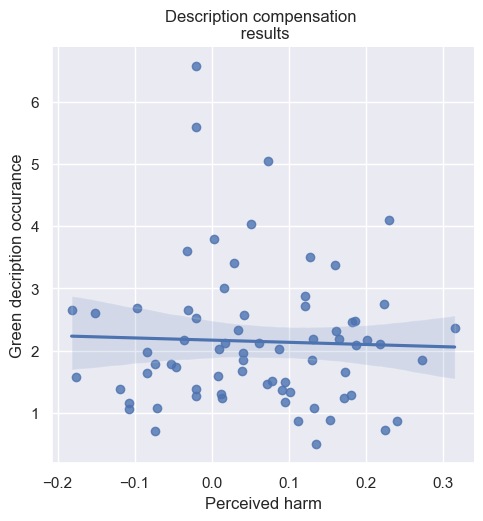

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x = 'perceived_harm', y = 'desc_green_count', data = keyword_results).set(
    title='Description compensation \n results',
    xlabel='Perceived harm',
    ylabel='Green decription occurance'
    )

plt.savefig('Results1.png', dpi=300, bbox_inches='tight')

In [ ]:
from random import seed
from random import gauss

seed(42)


ideal_data = pd.DataFrame(
    {'ideal_perceived_harm' : range(1, 100, 4)}
)

ideal_data['ideal_perceived_harm'] = ideal_data['ideal_perceived_harm'].apply(lambda x: x / 100 - 0.5).copy()

ideal_data['ideal_perceived_harm'] = ideal_data['ideal_perceived_harm'].apply(lambda x: x + gauss(0, 1))

ideal_data['ideal_desc_green'] = ideal_data['ideal_perceived_harm'].apply(lambda x: (x + gauss(0, 0.3) + 1) * 6).copy()



# ideal_x = ideal_x / 100 - 0.5
# ideal_y = ideal_x * 10

Create an ideal graph for visualising during the in-class presentation

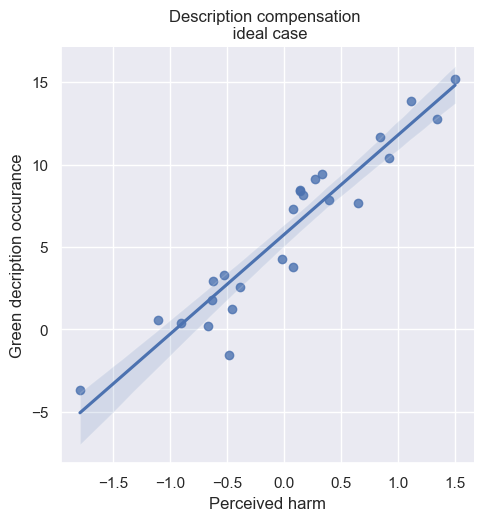

In [ ]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x = 'ideal_perceived_harm', y = 'ideal_desc_green', data = ideal_data).set(
    title='Description compensation \n ideal case',
    xlabel='Perceived harm',
    ylabel='Green decription occurance'
    )

plt.savefig('Ideal_case1.png', dpi=300, bbox_inches='tight')